In [19]:
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Import data

In [101]:
conf_presid = pd.read_html("http://www.pewglobal.org/database/indicator/6/survey/all/", na_values='-')[0]
conf_us = pd.read_html("http://www.pewglobal.org/database/indicator/1/survey/all/", na_values='-')[0]

In [91]:
conf_presid.head()

,Country,2003,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Argentina,nan,nan,nan,5.0,7.0,61.0,49.0,nan,nan,44.0,31.0,40.0,nan,13.0
1,Australia,59.0,nan,nan,nan,23.0,nan,nan,nan,nan,77.0,nan,81.0,84.0,29.0
2,Bangladesh,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,74.0,nan,nan,nan
3,Bolivia,nan,nan,nan,nan,nan,nan,nan,nan,nan,35.0,nan,nan,nan,nan
4,Brazil,nan,nan,nan,nan,nan,nan,56.0,63.0,68.0,69.0,52.0,63.0,nan,14.0


Change from 2015 to 2017

In [102]:
((conf_us['2017'].mean() - conf_us['2015'].mean()) / conf_us['2015'].mean()) * 100

-21.145184179675454

In [103]:
((conf_presid['2017'].mean() - conf_presid['2015'].mean()) / conf_presid['2015'].mean()) * 100

-54.51754385964912

Trend

In [104]:
cols_us = ['Country'] + ['Y' + str(i) for i in range(2002, 2018)]
conf_us.columns = cols_us
conf_us['id'] = conf_us.index
cols_pres = ['Country'] + ['Y' + str(i) for i in range(2002, 2018) if str(i) in conf_presid.columns]
conf_presid.columns = cols_pres
conf_presid['id'] = conf_presid.index

In [105]:
conf_us = pd.wide_to_long(conf_us, ['Y'], i='id', j='year')
conf_presid = pd.wide_to_long(conf_presid, ['Y'], i='id', j='year')

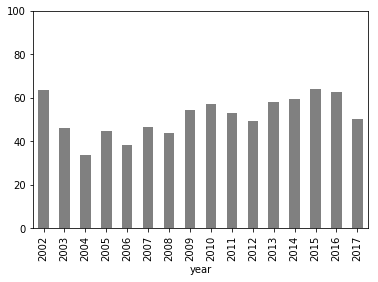

In [106]:
conf_us.groupby('year').Y.mean().plot(x='year', ylim=(0, 100), kind='bar', color='gray')

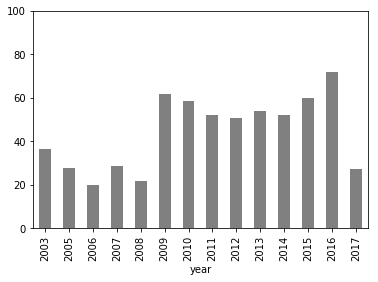

In [107]:
conf_presid.groupby('year').Y.mean().plot(x='year', ylim=(0, 100), kind='bar', color='gray')